In [6]:
import data_analytics as dataAnalysis
import matplotlib.pyplot as plt
import sympy as sp
from scipy import stats
from scipy import fftpack
from scipy import signal
import numpy as np
font = { 'size'   : 22}



Next Cell shows Raw data from our encoders

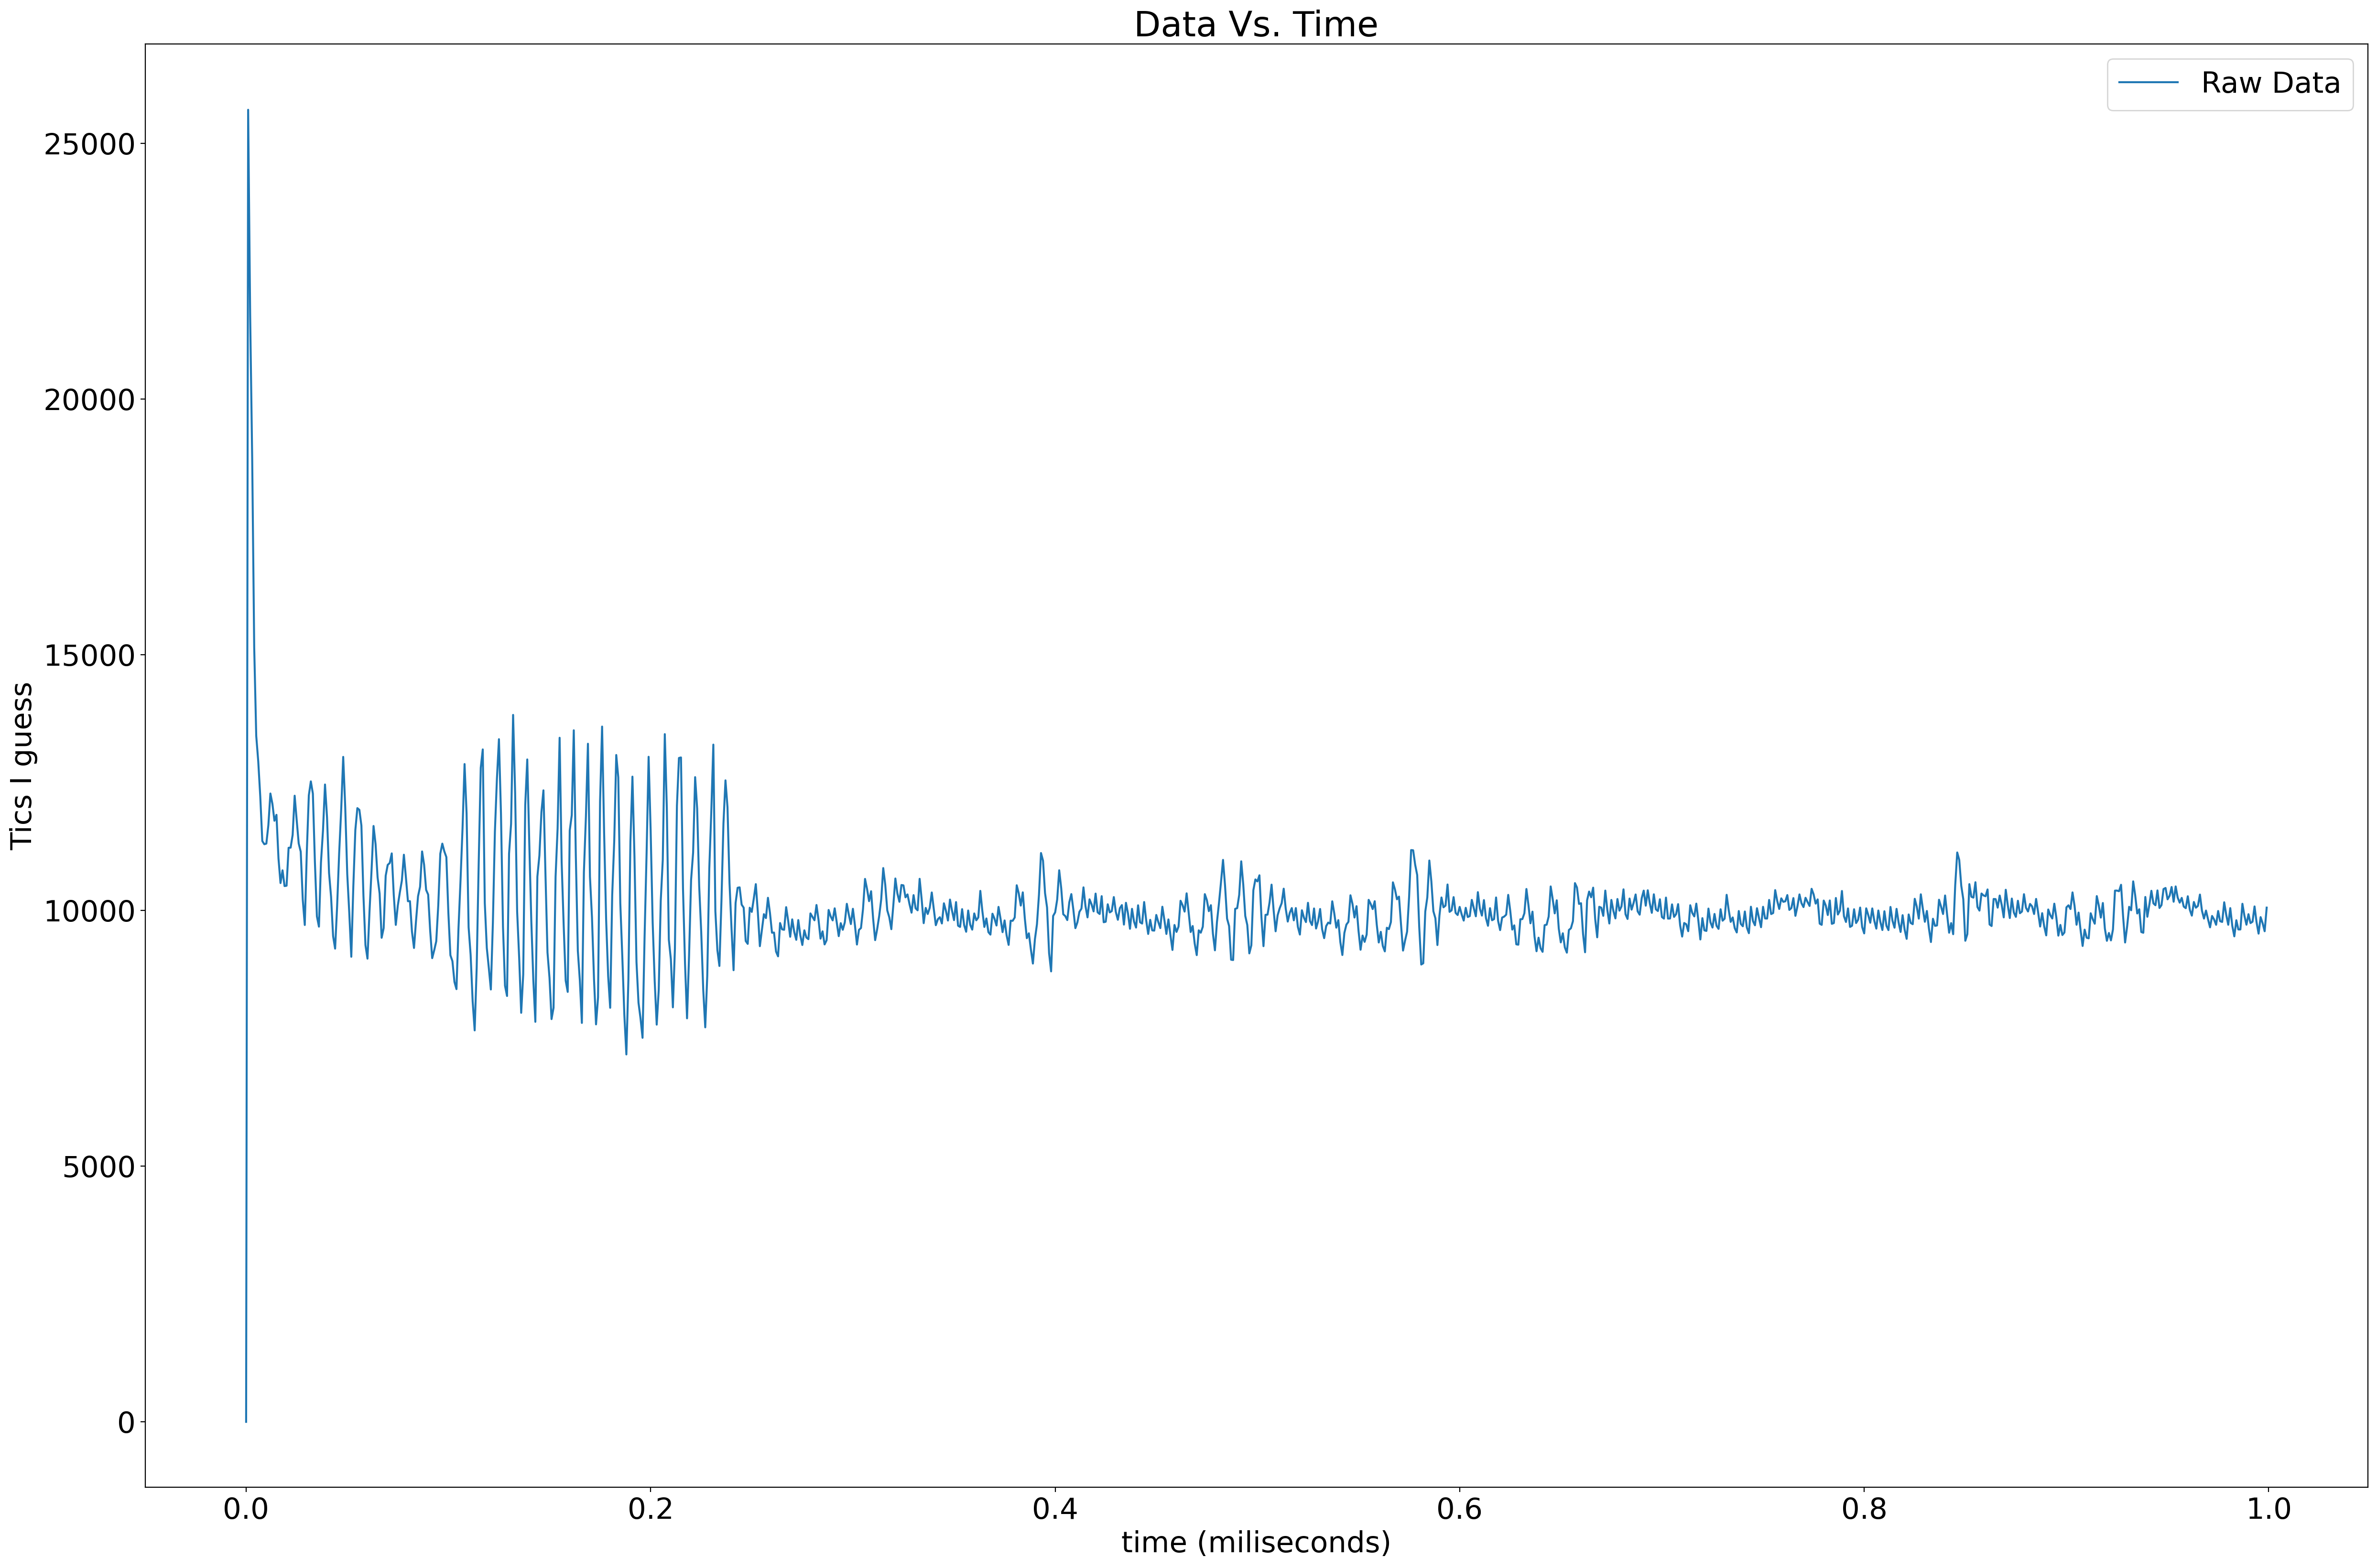

In [7]:
sample_period = 0.001
t, y_raw = dataAnalysis.load_csv_data( file_name='leftMotorRps_SamplingRate1ms_Target100rps.csv', sample_period=sample_period )

plt.rc('font', **font)
plt.figure(figsize=(30,20), dpi=200)
plt.plot( t, y_raw, label="Raw Data")
plt.title("Data Vs. Time")
plt.ylabel('Tics I guess')
plt.xlabel("time (miliseconds)")
plt.legend()
plt.show()


This signal was taken when tryping to maintain a steady 100 rpm. Obviously the signal has some noise we would like to remove. To do that, we are going to take the Fast Fourier Transform (FFT) of our data so we can see which frequencies are present in our data

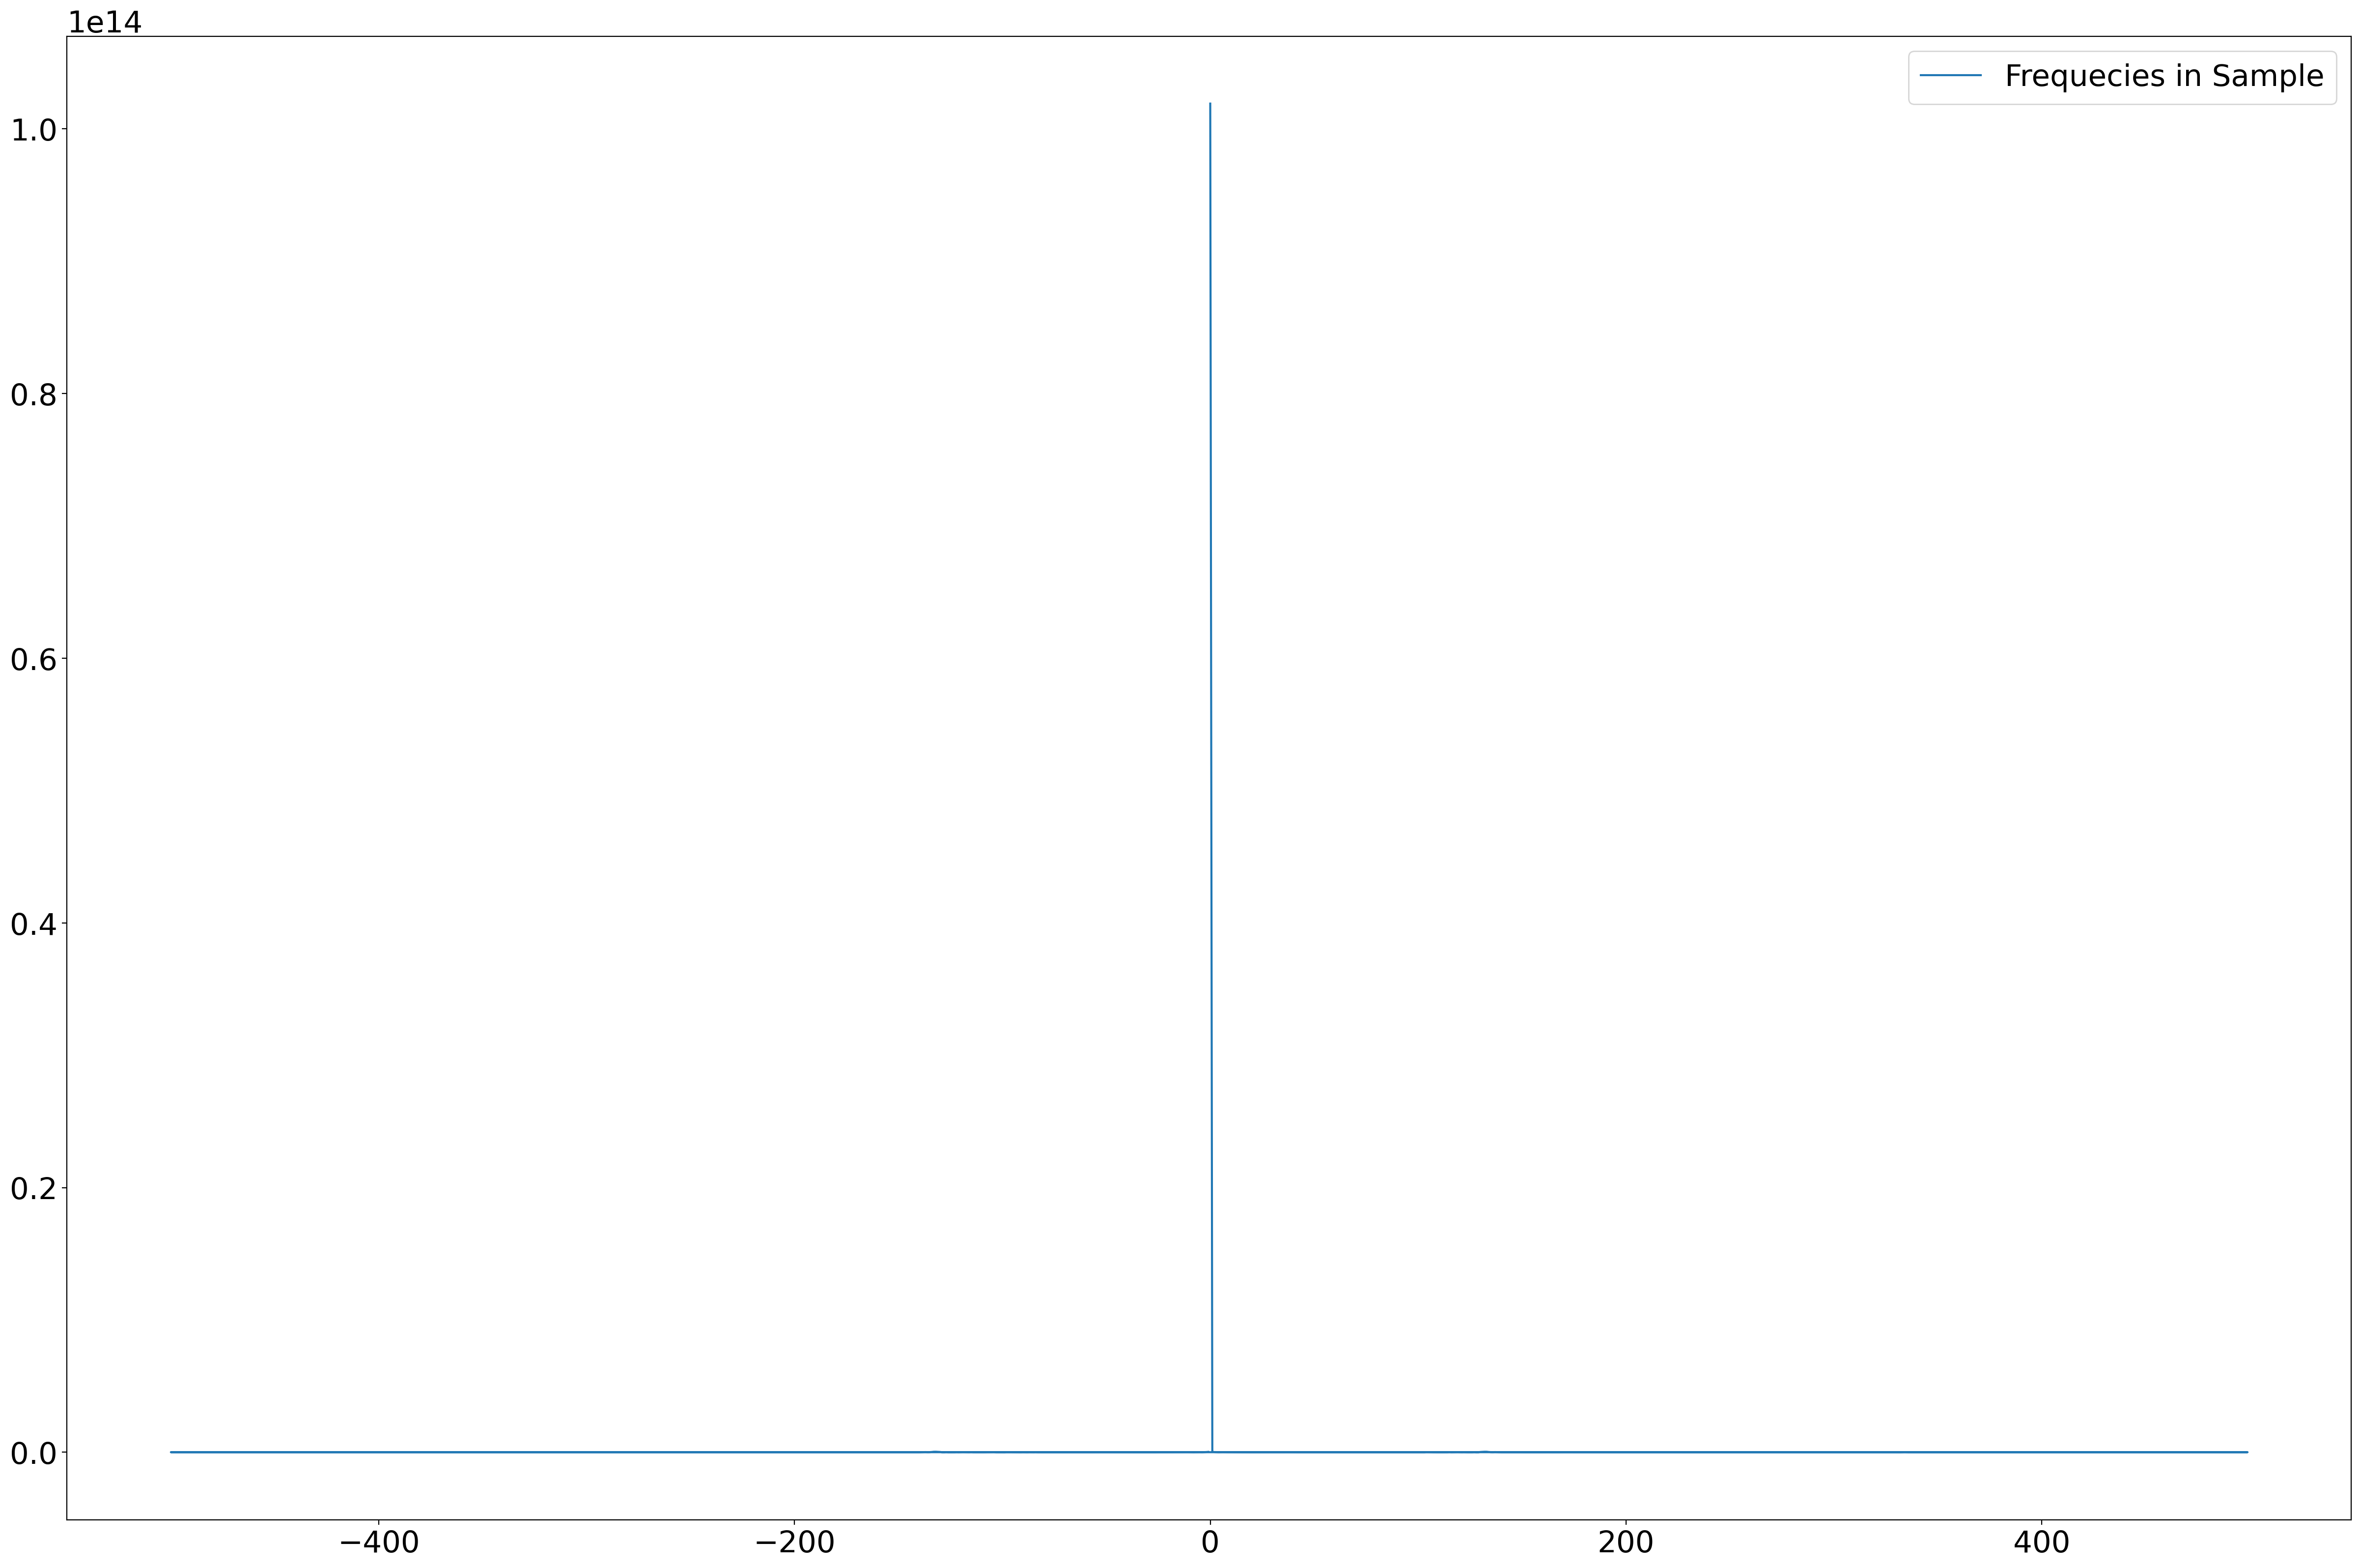

In [8]:
sample_freq = fftpack.fftfreq(len (y_raw ), d=sample_period )
data_fft =  np.fft.fft(y_raw)
power = np.abs( data_fft ) ** 2 

plt.rc('font', **font)
plt.figure(figsize=(30,20), dpi=200)
plt.plot( sample_freq , power, label="Frequecies in Sample")
plt.legend()
plt.show()



So it looks like there is no noise, but that's not quite true.
If we think about this for a second, our data is from a control loop that is actively trying to maintain a steady 100RPM. 

Since the controller is keeping a non-changing value of 100RPM, we have a signal massive Spike in the 0 Hz signal (the steady state of the system). Since that spike is fairly inconvenient, let's remove it by centering the set on zero. That way there will be no steady state frequency to prevent us from looking at the noise.

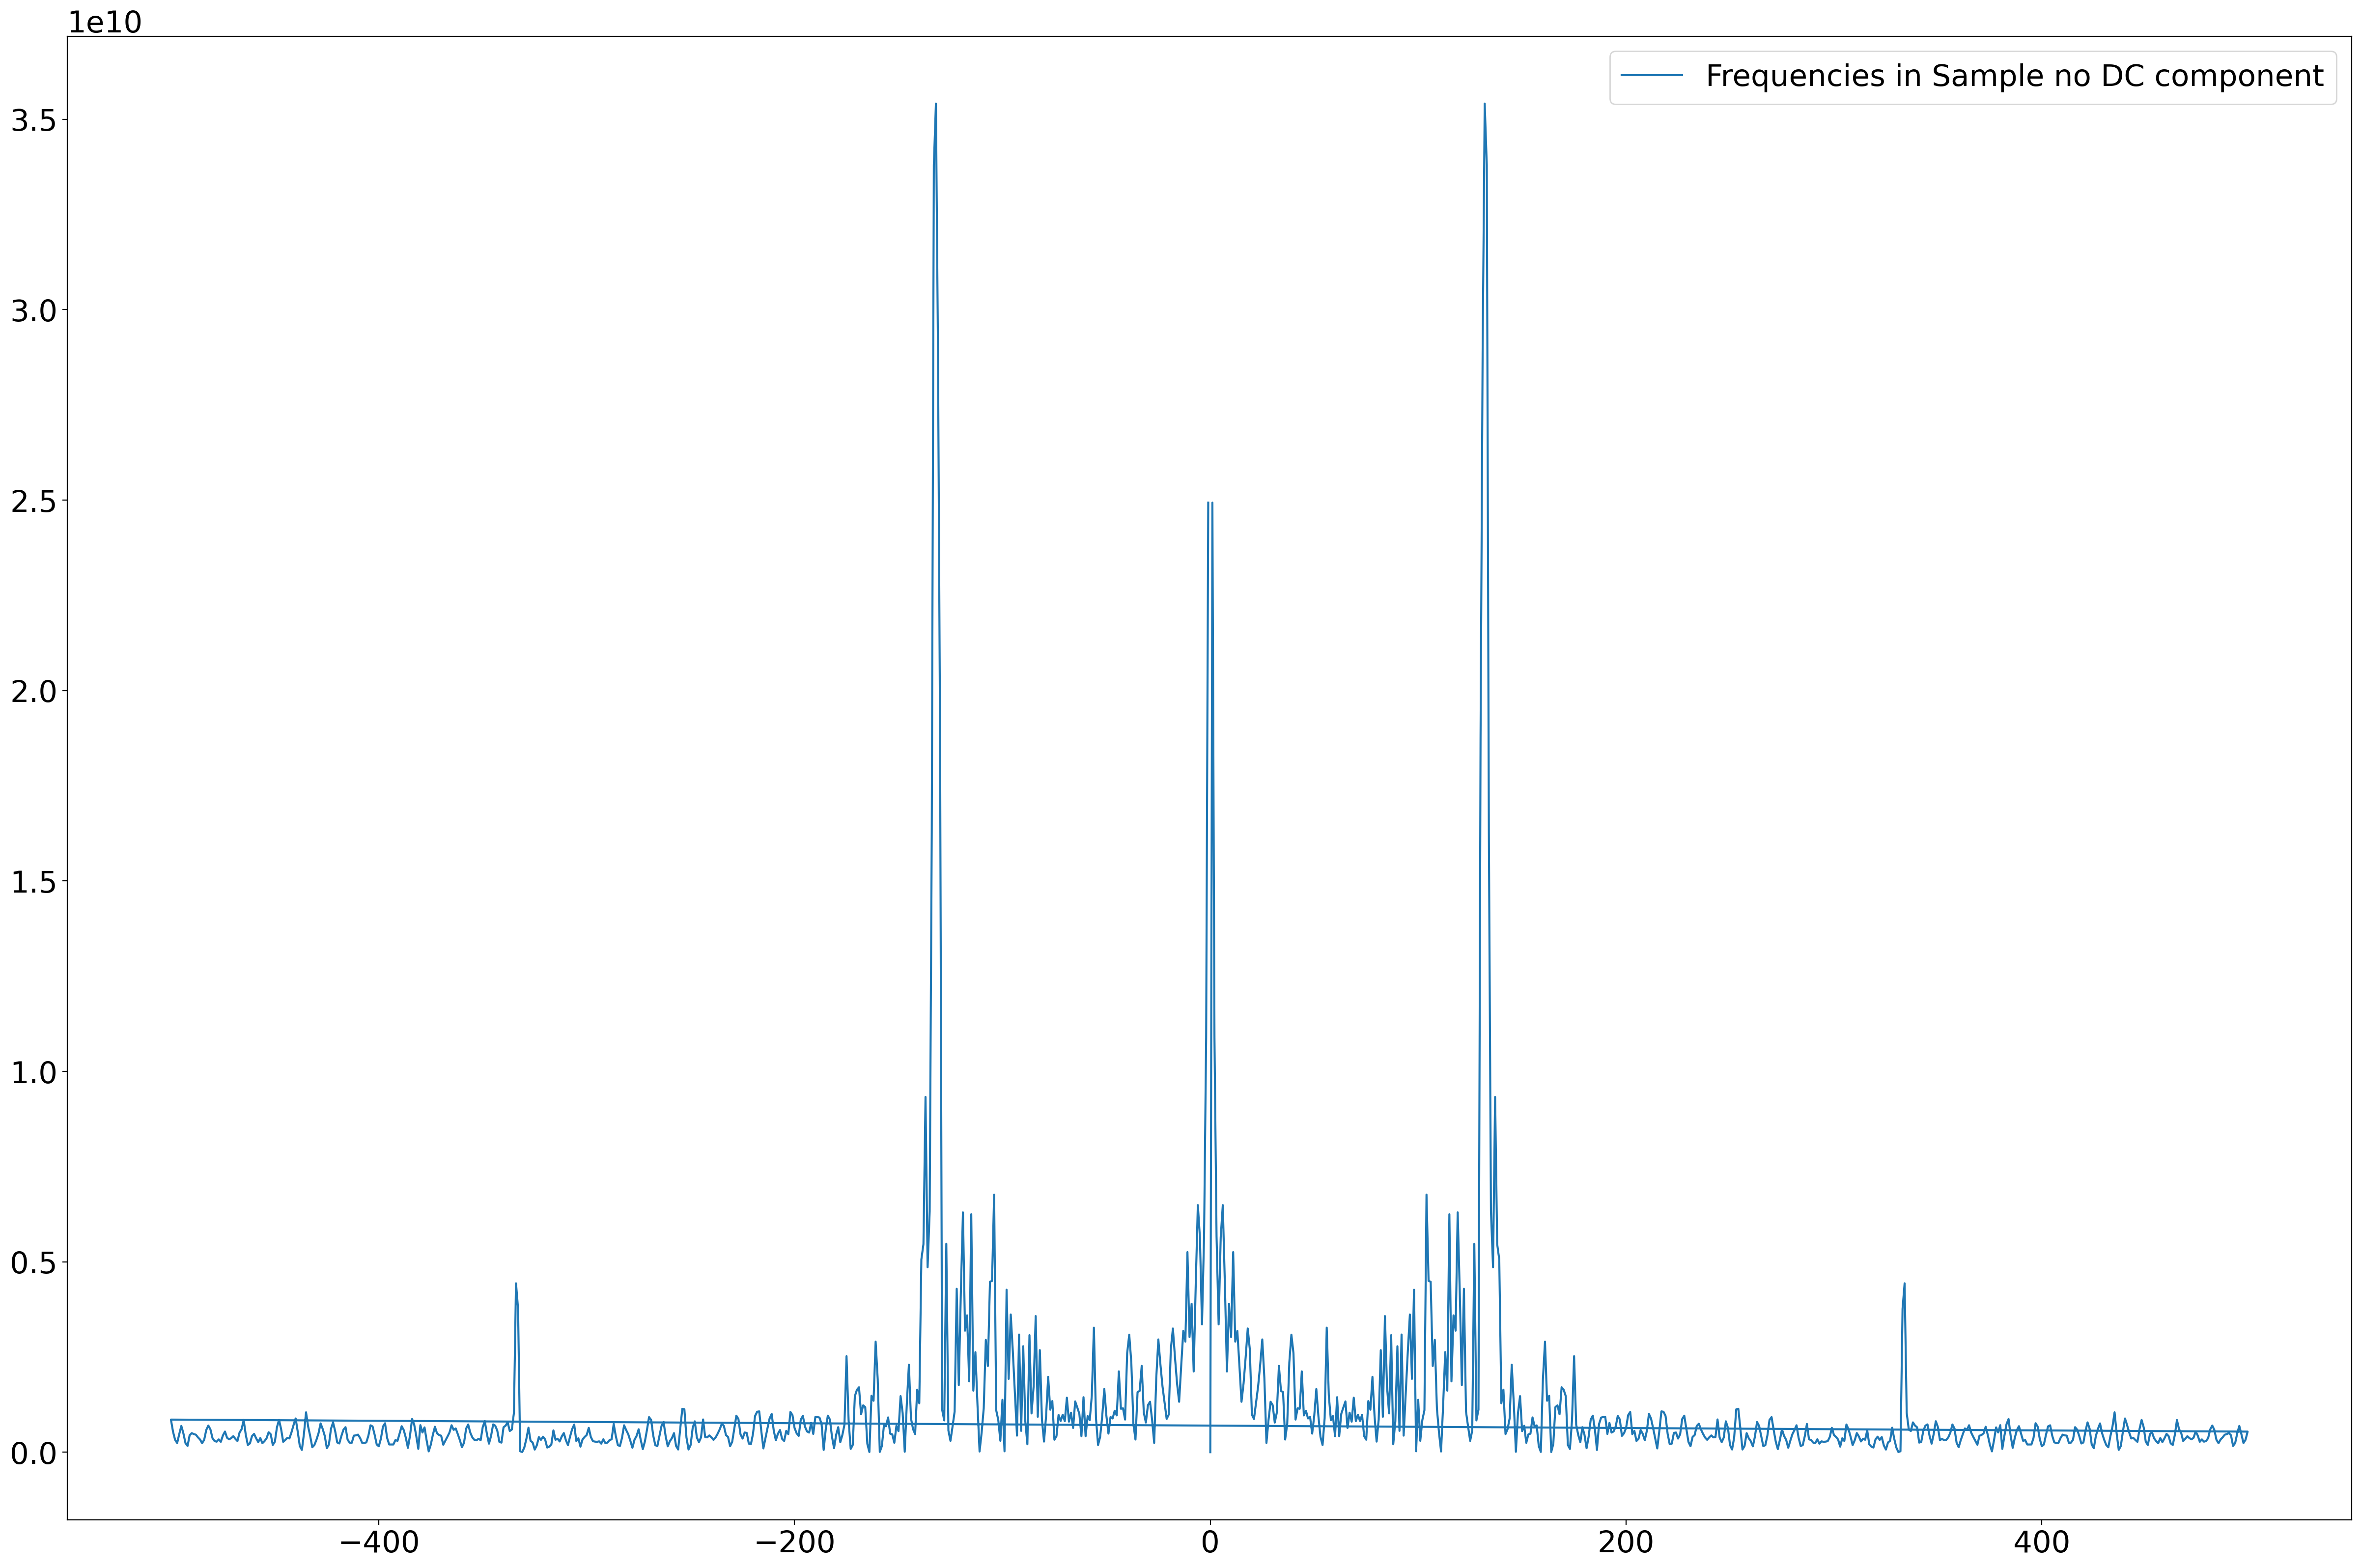

In [9]:
centered_zero_data = y_raw -  np.average(y_raw)
centered_fft =  np.fft.fft(centered_zero_data)
centered_power = np.abs( centered_fft ) ** 2 

plt.rc('font', **font)
plt.figure(figsize=(30,20), dpi=200)
plt.plot( sample_freq , centered_power, label="Frequencies in Sample no DC component" )
plt.legend()
plt.show()

We can see a lot more of the noise now! Let's use a digital filter on the signal to see how much of the noise we can shave off.

I am going to use a ButterWorth Filter.

Butter_num:  [0.00852688 0.01705375 0.00852688] , butter_den:  [ 1.         -1.72232356  0.75643106]


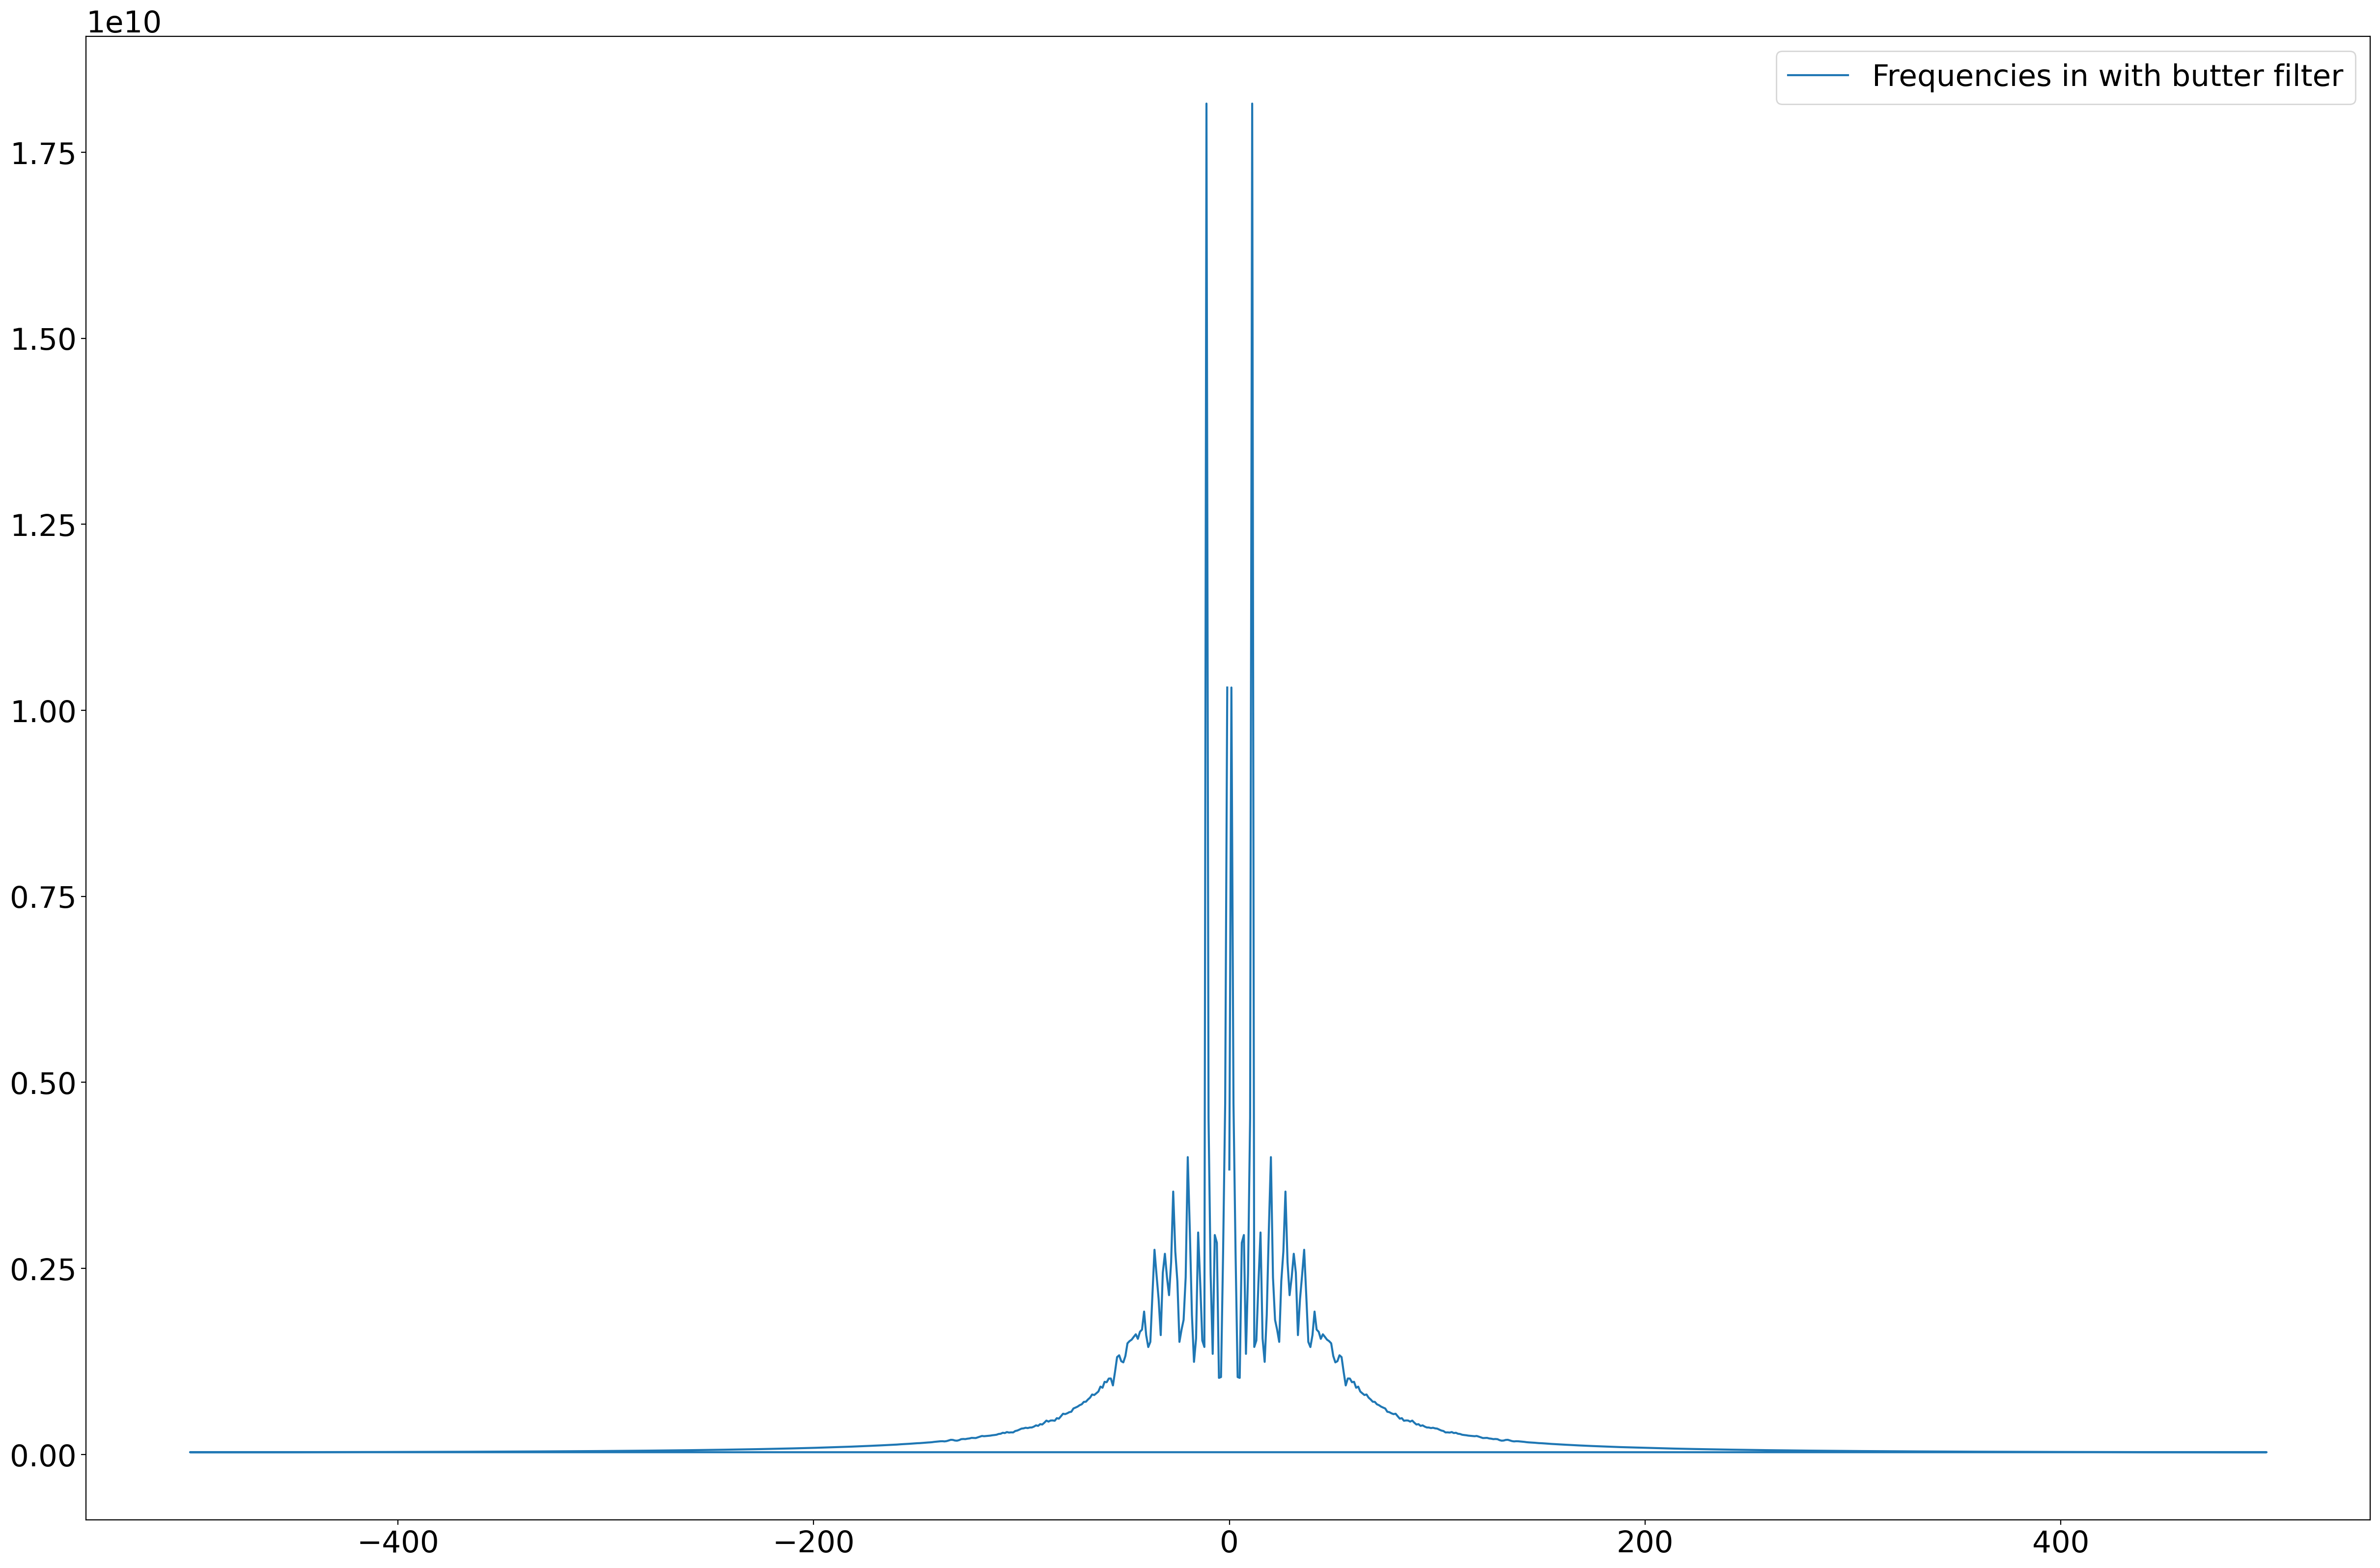

In [11]:
butter_num, butter_den = dataAnalysis.butter_worth(cutOffFrequency_hz=.01)
print ("Butter_num: ", butter_num, ", butter_den: ",butter_den)
filtered_y = signal.filtfilt(butter_num, butter_den, centered_zero_data )

filtered_fft =  np.fft.fft(filtered_y)
filtered_power = np.abs( filtered_fft ) ** 2 

plt.rc('font', **font)
plt.figure(figsize=(30,20), dpi=200)
plt.plot( sample_freq , filtered_power, label="Frequencies in with butter filter" )
plt.legend()
plt.show()

Now, let's look at the time series data

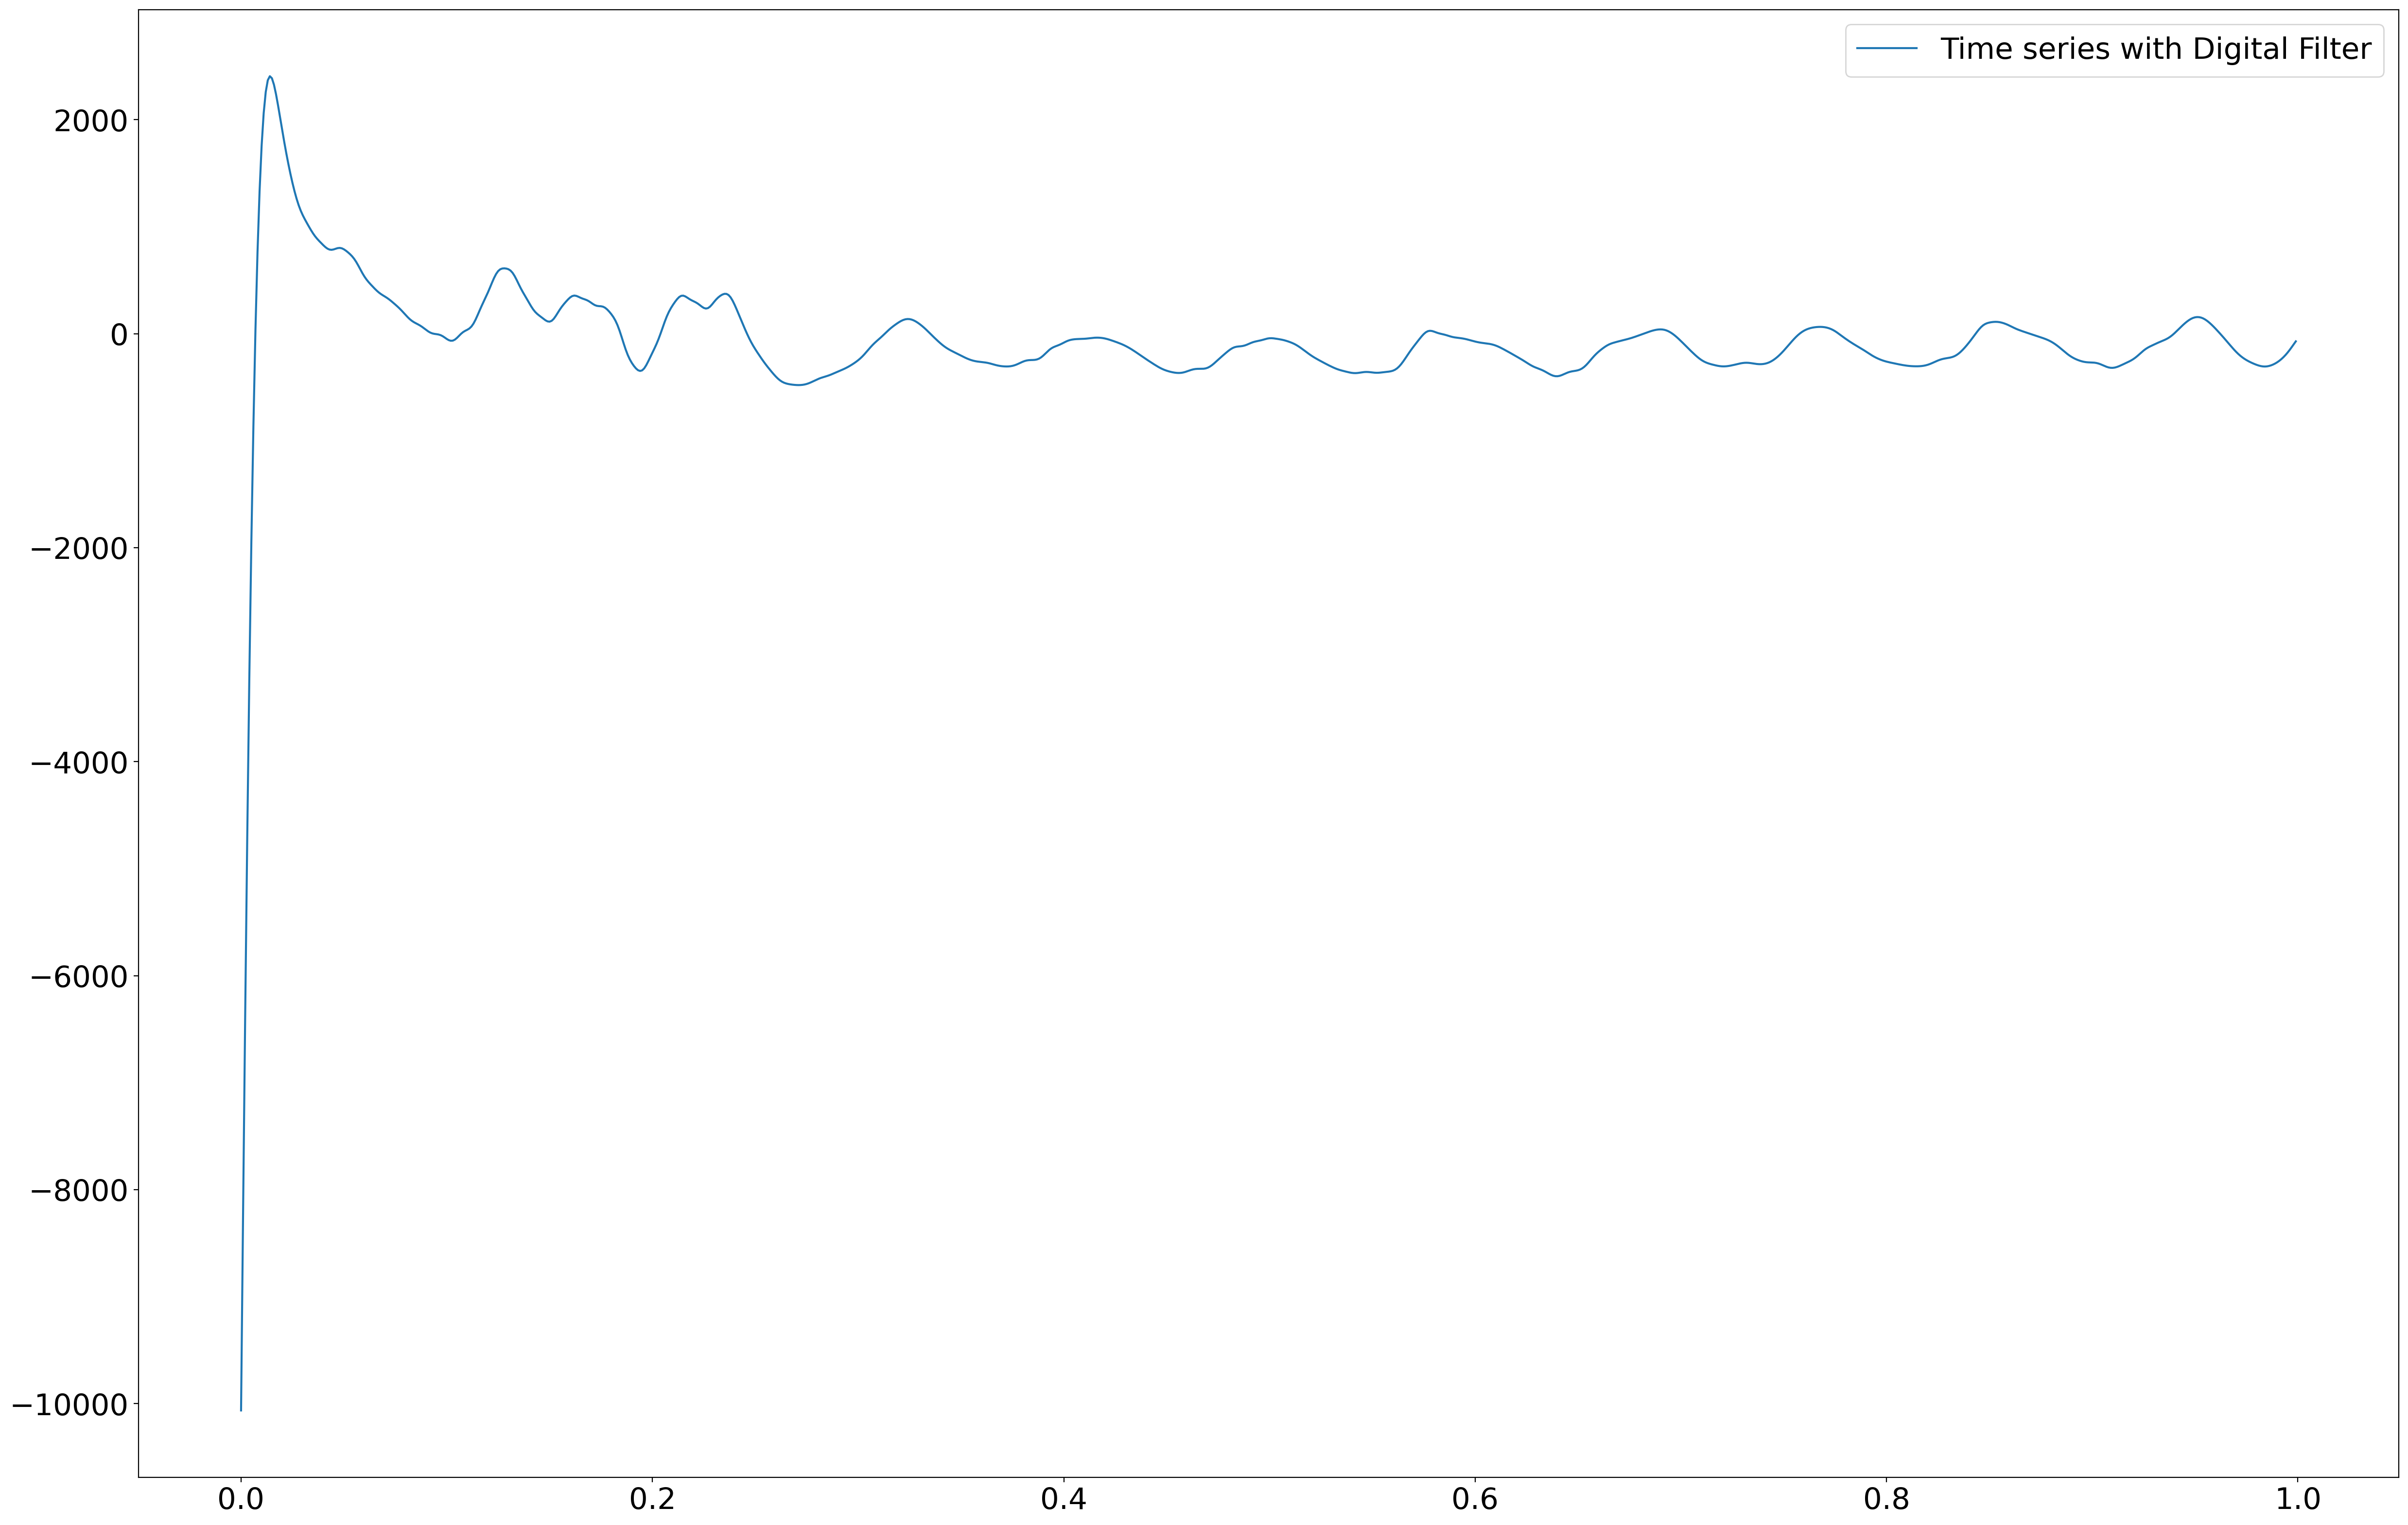

In [12]:
plt.rc('font', **font)
plt.figure(figsize=(30,20), dpi=200)
plt.plot( t , filtered_y, label="Time series with Digital Filter" )
plt.legend()
plt.show()